## Table Of Content :
 [Simple Linear Regression: ](#first-bullet)
1. [1.Linear Regression with one variable: Cost Function.](#second-bullet)
2. [2.The cost function intuition.](#third-bullet)
3. [3.Linear regression with one variable.](#fourth-bullet)
4. [4.Gradient Descent.](#fifth-bullet)
5. [5.Gradient descent algorithm for linear regression.](#sixth-bullet)
6. [6.Implementation of the gradient descent on the plotted Data.](#seventh-bullet)
7. [7.Fit the line with the help of the estimated parameters ${\theta}_i$.](#eighth-bullet)
8. [8.Visualizing $J({\theta}_0,{\theta}_1)$ vs ${\theta}_0,{\theta}_1$.](#ninth-bullet)
9. [9.Linear Regression using scikit-learn.](#tenth-bullet)
10. [10.Linear Regression from Statistical point of view and Least Square.](#eleventh-bullet)
11. [11.Linear Regression using normal equations.](#11) 

 [References](#twelfth-bullet)


## Simple Linear Regression:  <a class="anchor" id="first-bullet"></a>


First the simple Linear regression is supervised learning method.**Supervised learing:** In which the trainig data comprises examples of the input vectors along with their corresponding target vectors.Simple linear regression is useful for finding relationship between two continuous variables or real values.One is predictor or independent variable and other is response or dependent variable. **It looks for statistical relationship but not deterministic relationship.** Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.

The simplest example is you had given the size of the houses in square feet and prices (USD) of each house and you want to predict the price of the house for future input of the size.As shown below.



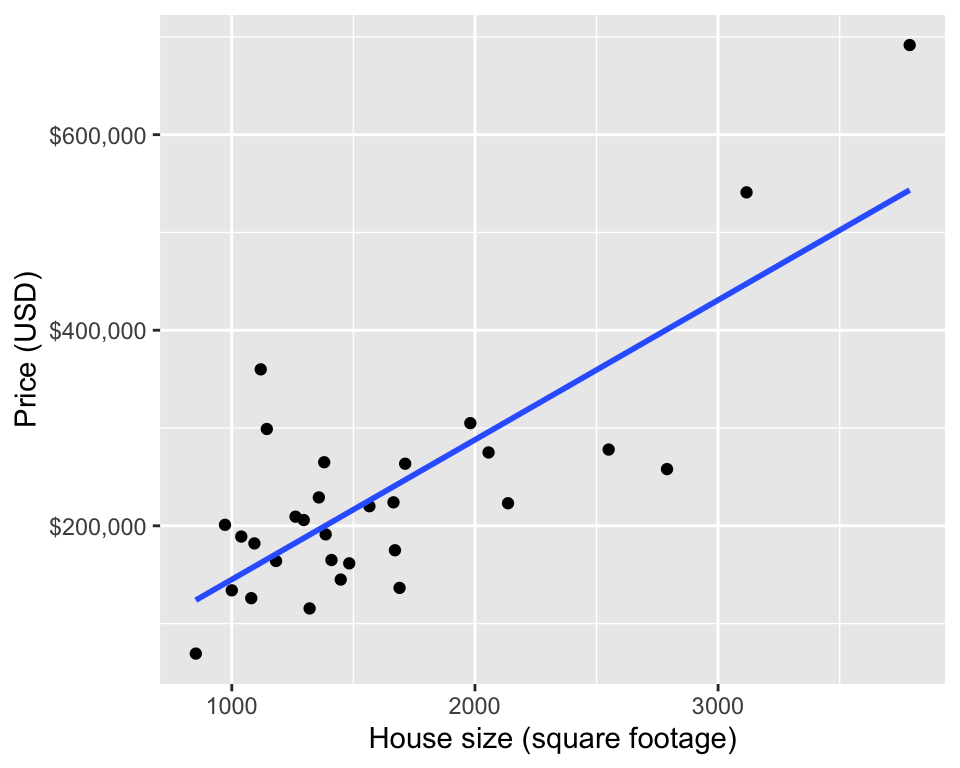

In [1]:
from IPython.display import Image
Image("lin-reg.png",width=600,height=500)

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.
(Do not worry if this is not clear to you as we move ahead you will get it).so we will go step by step to build the model.



## 1. Linear Regression with one variable: Cost Function.  <a class="anchor" id="second-bullet"></a>

First we talk about the **hypothesis**.Do not worry about the name hypothesis it is just a fancy name.   

hypothesis:
$$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$$ 


where $\theta_i$ is parameters.

how to choose $\theta_i$ ?

At first glance the above equation you will find similar to the straight-line equation $ y=mx+c $. Yes, your intuition is correct.$ y $ is the linear function of the variable $ x $.



In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def my_plot(theta_0,theta_1):
    x = np.linspace(1,5,100)
    
    h_theta_x= theta_0 + (theta_1*x)
    plt.figure(num=0, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x, h_theta_x, '-r')
    plt.title('straight line fit with %.2f slope and %.2f as a y intercept.' % (theta_1,theta_0) ,fontsize=12)
    plt.xlabel('$x$',fontsize=14)
    plt.ylabel(r'$\ h_{\theta}(x)$ ',fontsize=14)
    plt.grid(which='both')
    plt.show()

#my_plot(theta_0=(1),theta_1=(1))
    
# create a slider
interact(my_plot, theta_0=(0,2,0.5),theta_1=(0,1,0.5))

interactive(children=(FloatSlider(value=1.0, description='theta_0', max=2.0, step=0.5), FloatSlider(value=0.0,…

<function __main__.my_plot(theta_0, theta_1)>

In the above plots we had use different values of $\theta_0 $ and $\theta_1 $ and plot the different hypothesis.

In linear regression, we are fitting the straight line through data as mention in the house prediction example.We chose $\theta_0 $ and $\theta_1$ such that my hypothesis $ h_{\theta}(x)$ the **value we predict on input vector $ X $** is very close to the actual (label/target/answers) values $ y $ given in the training examples $ (x,y)$.In simple terms given $ x $ values(house sizes) and values for $ y $ (Price of the houses) by choosing the plausible values for $\theta$ we try to predict the accurate value of $ y $ to given new value for $ x $ 

So let's understand mathematically how we can formulate this idea using the **Cost Function**.

$$
\min_{{\theta}_0,{\theta}_1} \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$

Where 
$$
\begin{aligned}\ h_{\theta}(x^{(i)})={\theta}_0 +{\theta}_1x^{(i)} \end{aligned}
$$ 

Let's 
$$  
J({\theta}_0,{\theta}_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 

$$ 
\min_{{\theta}_0,{\theta}_1} J({\theta}_0,{\theta}_1)
$$

Where
$
J({\theta}_0,{\theta}_1)
$
is the **Cost Function**

In the cost function the superscript $ i $ is running from $ 1 $ to $ m $ for my $ m $ training examples.The minimization problem says to find the values of parameters $\theta_0 $ and $\theta_1$ so that the average value of the **squared error** between predicted value(hypothesis)$ h_{\theta}(x)$ and or minus the actual value $ y $  is as small as possible.The cost function is also known as square error cost function which is our objective function.

Think about this:
1. Why one over 2 
2. Why squared error cost function? 



## 2.The cost function intuition. <a class="anchor" id="third-bullet"></a>

Now we will try to understand the cost function more intuitively.So following is the task.

hypothesis:
$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$ 

Parameters:
$
{\theta}_0,{\theta}_1 
$

Cost function:
$  
J({\theta}_0,{\theta}_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$ 

Goal:
$$ 
\min_{{\theta}_0,{\theta}_1} J({\theta}_0,{\theta}_1)
$$

So goal here is to minimize the cost function $J({\theta}_0,{\theta}_1)$,Consider the simplified case i.e. ${\theta}_0=0$  
$
\begin{aligned}\ h_{\theta}(x)={\theta}_1x \end{aligned}
$ 

This will always the straight line passing from the origin.The cost function will be 
$  
J({\theta}_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$
and 

$$ 
\min_{{\theta}_1} J({\theta}_1)
$$

Now we will visualize for different values of (fixed ${\theta}_1$) how the hypothesis is change which is the function of the $x$ and same time how the cost function (which is the function of the ${\theta}_1$ ) changes for those values of ${\theta}_1$.     

In [3]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

def my_plot_1(theta_1):
    theta_0=0
    print(theta_1)
    X= np.linspace(1,5,10)
    Y= np.linspace(1,5,10)
    h_theta_x= theta_0 + (theta_1*X)
    # plot of hypothesis vs X
    plt.figure(num=0, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(X,Y,'ro',X,h_theta_x,'k')
    plt.title(r'$\ h_{\theta}(x)$ (for fixed $\theta_1$,$\ h_{\theta}(x)$ is a function of $x$)',fontsize=12)
    plt.xlabel('$X$',fontsize=12)
    plt.ylabel('$Y$',fontsize=12)
    plt.grid(which='both')
   
    # estimating the cost function and ploting cost function vs theta plot
    j_theta_1=(1/2)*mean_squared_error(Y,h_theta_x)
    print(j_theta_1)
    plt.show()

interactive_plot=interact(my_plot_1,theta_1=(0,2,0.125))
output = interactive_plot.widget.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='theta_1', max=2.0, step=0.125), Output()), _dom_clas…

<function __main__.my_plot_1(theta_1)>

In the above first plot the hypothesis
$
\begin{aligned}\ h_{\theta}(x)={\theta}_1x \end{aligned}
$ 
for the fixed value of the $ {\theta}_1 $ is function of $x$. You can change the value of the $ {\theta}_1 $ from the slider and see for the different fixed values of the ${\theta}_1 $ slope of the line changes and at ${\theta}_1 =1 $ it fits the data perfectly. As the value of the ${\theta}_1 $ changes the from $0$ to $2$ (First value printed above the plotted figure) the mean square error get decrease and again increases.(Second value Printed above the plotted figure). 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipyw

j_theta_1T=[5.3148,4.0691,2.9895,2.076099,1.3287,0.74739,0.3321,0.08304,0,0.08304,0.3321,0.7473,1.3287,2.076099,2.9895,4.0691,5.3148]
X_T=np.linspace(0,2,17)

def my_plot_2(t):
    print(t)
    plt.figure(num=0, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(X_T,j_theta_1T,'b', t/8,j_theta_1T[t],'ro')
    plt.title(r'$J({\theta}_1)$ (function of the parameter $\theta_1)$',fontsize=12)
    plt.xlabel(r'$\theta_1$',fontsize=12)
    plt.ylabel(r'$J({\theta}_1)$',fontsize=12)
    plt.grid(which='both')
    plt.show()


interactive_plot=ipyw.interact(
    my_plot_2,
    t=ipyw.IntSlider(min=0, 
                     max=(len(j_theta_1T)-1), 
                     step=1, 
                     value=0)
)
output = interactive_plot.widget.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=0, description='t', max=16), Output()), _dom_classes=('widget-interact',…

<function __main__.my_plot_2(t)>

 

Second plot is the plot of $J({\theta}_1)$ vs ${\theta}_1 $ & how the cost function $J({\theta}_1)$ get minimize as we fit the line perfectly to the data at ${\theta}_1 =1 $ and you can verify that as line is perfectly fit at  ${\theta}_1 =1 $  the $J({\theta}_1)=0$ and it is visible in above plot;Just change the `t` which is index for different ${\theta}_1 $ and  at $t=8$ the ${\theta}_1 =1 $ and $J({\theta}_1)=0$.   

Think about this:

1. What if we consider case ${\theta}_0$ included in the hypothesis equation?

2. What would be the dimension of the plot Hypothesis vs Parameters i.e.
$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$ 
   vs ${\theta}_0 ,{\theta}_1 $ ?

3. Does the shape of the plot remain same as bowl shape or changes ?

4. What is the relevant way to reach the minimum point or minimize the cost function to best fit the hypothesis?

To answer these questions we take a real time data and work on it here onwards.Before going ahead one last thing I would like to mention is about **Least Square error**. If you carefully see the cost function $J({\theta})$ which we are trying to minimize to find ${\theta}$ is actually an **error value** or **average square error** which we want as least value,hence called **Least Square error**. We will talk more about this in module 10. 


## 3.Linear regression with one variable. <a class="anchor" id="fourth-bullet"></a>

In this part of this,we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

## Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can not  be plotted on a 2-d plot.)

The file `ex1data1.txt` contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [5]:
import pandas as pd
#read comma separated data and give the proper names to the columnes
df = pd.read_csv('ex1data1.txt',header = None,names=["Population","Profit"])

In [6]:
df.head() # first five rows along with columns

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
df.shape # good to know the dimension  

(97, 2)

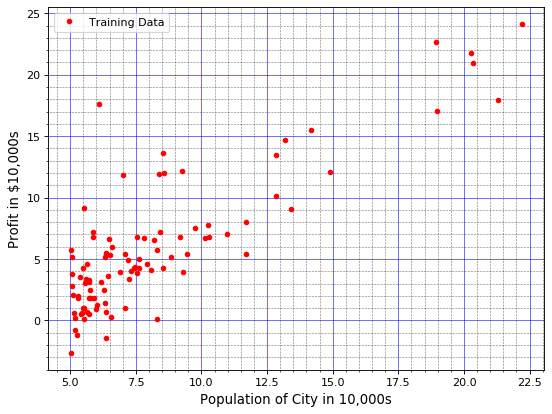

In [8]:
x=df.iloc[:,0:1].values
#x=df1
#print(x)
y=df.iloc[:,1:2].values
#y=df2
#print(len(y))
plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y,'ro',markersize=4,label="Training Data");     # plot the data 
plt.ylabel('Profit in $10,000s',fontsize=12);             # Set the y axis label
plt.xlabel('Population of City in 10,000s',fontsize=12);  # Set the x axis label

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(loc="upper left")
plt.show()

## 4.Gradient Descent. <a class="anchor" id="fifth-bullet"></a>

So answer for the **fourth question** above is as follows,We need a methodology or the Algorithm which will automatically find the values of the parameters ${\theta}_0 ,{\theta}_1 $ for my hypothesis
$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$
and reduced my cost function $J({\theta}_0,{\theta}_1)$ to the minimum value by adjusting the ${\theta}_0 ,{\theta}_1 $.The name of that algorithm is **Gradient Descent**.The Gradient Descent is very generalize algorithm to reduce/minimize any Non linear function,here we will use to minimizing the cost function
$
J({\theta}_0,{\theta}_1)
$ 

Before going ahead specifically to use the Gradient Descent for above plotted data set for univariate linear regression, we first understand the generalize overview of the algorithm.

So supposed we have function $J({\theta}_0,{\theta}_1,{\theta}_2,{\theta}_3 ..{\theta}_n)$ and wanted to minimize it $$ 
\min_{{\theta}_0,{\theta}_1,{\theta}_n} J({\theta}_0,{\theta}_1...{\theta}_n)
$$

**Outline**: consider the case of the two parameters $ {\theta}_0,{\theta}_1$ 

* start with some arbitrary value $ {\theta}_0,{\theta}_1 $

* keep changing the ${\theta}_0,{\theta}_1 $ to reduce $J({\theta}_0,{\theta}_1)$ until we end up at the minimum position or may be local minimum.

As shown in the below figure.



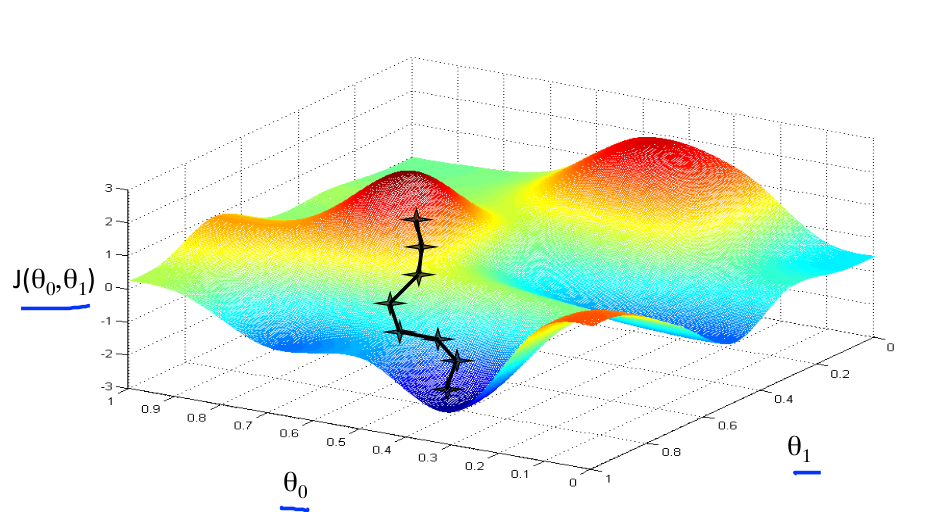

In [9]:
Image("G1.png",width=600,height=500)


So in the above figure/plot we found out the answer for **first Question** and the **Second Question** as we include ${\theta}_0$ in the hypothesis
$
\begin{aligned}\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$
The cost function will reach to minimum values by varying the both ${\theta}_0,{\theta}_1 $ i.e. the cost function is function of the both ${\theta}_0,{\theta}_1$. The plot of the
$
J({\theta}_0,{\theta}_1)
$
vs
${\theta}_0,{\theta}_1$. is 2-D.

Here we started with an arbitrary value $ {\theta}_0,{\theta}_1 $ values and with step forward of steepest descent we reach to the local minimum.


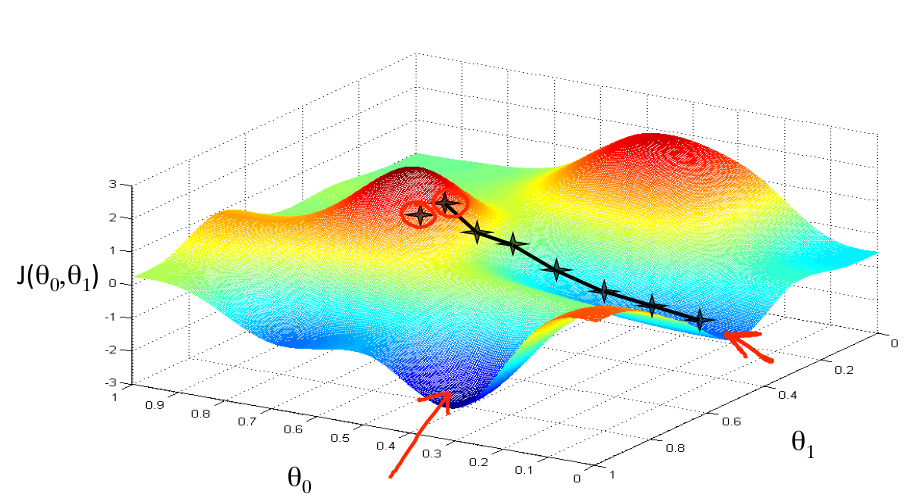

In [10]:
Image("G2.png",width=600,height=500)


The gradient descent has interesting property as shown above as we start with different arbitrary value 
$ {\theta}_0,{\theta}_1 $ we end up with an another local optimum.

Think about this: 
1.  Does the gradient descent always converge to an optimum (global or local)?



**Gradient descent algorithm**	

That is all about the intuition in the pictorial form,let's look at the mathematically the same

repeat until  converges 
{
 
$
\large {\theta}_j:={\theta}_j- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j} 
$

( for $\large j=0$ and $\large j=1$ )

}

  
simultaneously update the the ${\theta}_0 $ and ${\theta}_1$

$
\large {\theta}_0:={\theta}_0- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_0}
$

$
\large {\theta}_1:={\theta}_1- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_1}
$


Here the $\large\alpha$ is the learning rate and soon we will talk about this,second thing $\large \frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j}$ is the first order partial differentiation which you can think like rate of change of the cost function $ J({\theta}_0,{\theta}_1)$ w.r.t  ${\theta}_j$


**Intuition of the learning rate $\large\alpha$ and partial differentiation $\large \frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j}$**

To understand the learning rate $\large\alpha$  and partial differentiation $\large \frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j}$ we will take again the simple case as(We had taken while understanding the cost function intuition )by considering only ${\theta}_1$ any real number,so the hypothesis become
$
\begin{aligned}\ h_{\theta}(x)={\theta}_1x \end{aligned}
$
and try to minimize 
$$
\min_{{\theta}_1} J({\theta}_1)
$$

The Gradient descent algorithm equations become 
$
\large {\theta}_1:={\theta}_1- \Large\alpha\frac{\partial J({\theta}_1)}{\partial {\theta}_1}
$

Here the $\large\alpha$ is the learning rate which is always a positive number & decides the step size/width.The steps/width with which we move towards the local/global minimum or reduce the cost function to minimum value.The partial differentiation $\large \frac{\partial J({\theta}_1)}{\partial {\theta}_1}$ is **slope to the curve** of
the plot of the
$
J({\theta}_1)
$
vs
${\theta}_1$.
The slope can be positive or negative and as $\large\alpha$ is always positive,**hence the parameter ${\theta}_1$ updated positively or negatively with the steps/step size/width depends upon the $\large\alpha$.**


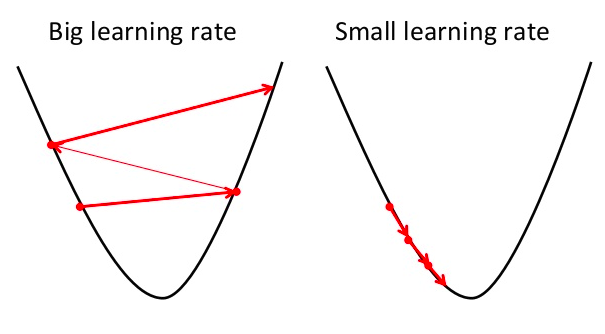

In [11]:
Image("G3.png",width=600,height=500)


Above fig shows the effect of the large and small value learning parameter $\large\alpha$ on search of the minimum value of the cost function $J({\theta}_1)$ or search of the local optimum or to zero slope value.When  $\large\alpha$ is small the Gradient descent is slow will take time to converge and when $\large\alpha$ is large Gradient descent overshoot the minimum and can fail to converge.

Now the answer to the question **Does the gradient descent always converge to an optimum (global or local)?**
Gradient Descent is an algorithm which is designed to find the optimal points, but these optimal points are not necessarily global. And yes if it happens that it diverges from a local location it may converge to another optimal point but its probability is not too much. The reason is that the step size might be too large that prompts it recede one optimal point and the probability that it oscillates is much more than convergence.

What if initial selection of ${\theta}_1$ is itself land us on local optimum then gradient descent will not update the ${\theta}_1$ as the slope $\large \frac{\partial J({\theta}_1)}{\partial {\theta}_1}$ at value of ${\theta}_1$ to the curve is zero as shown below.



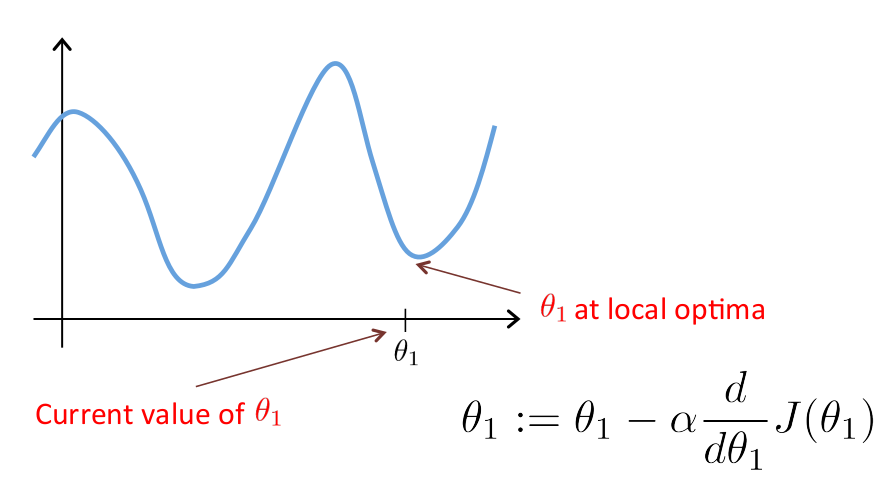

In [12]:
Image("G.png",width=600,height=500)


Lastly gradient descent can converges to local optimum even when  $\large\alpha$  is fixed. As  $\large\alpha$  is fixed and as we approach to the local minimum gradient descent will automatically take smaller steps,no need to decrease the $\large\alpha$  over time.

## 5.Gradient descent algorithm for linear regression. <a class="anchor" id="sixth-bullet"></a>	

**Gradient descent algorithm**	

That is all about the intuition in the pictorial form,let's look at the mathematically the same

repeat until  converges 
{
 
$
\Large {\theta}_j:={\theta}_j- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j} 
$

( for $\large j=0$ and $\large j=1$ )

}

**Linear regression model**

hypothesis:
$
\begin{aligned}\Large\ h_{\theta}(x)={\theta}_0 +{\theta}_1x \end{aligned}
$ 


Cost function:
$  
\Large\ J({\theta}_0,{\theta}_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$ 




$
\Large\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_j}=
\Large\frac{\partial \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 }{\partial {\theta}_j}=
\Large\frac{\partial \frac{1}{2m} \sum_{i=1}^m({\theta}_0 +{\theta}_1x^{(i)}-y^{(i)})^2 }{\partial {\theta}_j}
$

$
j=0 :\large\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_0}=\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})
$

$
j=1 :\large\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_1}=\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}) 
$

**Gradient descent algorithm for Linear Regression**

simultaneously update the the ${\theta}_0 $ and ${\theta}_1$

repeat until  converges 
{

$
\large {\theta}_0:={\theta}_0- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_0}
$

$
\large {\theta}_1:={\theta}_1- \Large\alpha\frac{\partial J({\theta}_0,{\theta}_1)}{\partial {\theta}_1}
$

}

Which becomes

simultaneously update the the ${\theta}_0 $ and ${\theta}_1$

repeat until  converges 
{

$
\large {\theta}_0:={\theta}_0- \Large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})
$

$
\large {\theta}_1:={\theta}_1- \Large\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x^{(i)}) 
$

}

As we discussed above the we start with arbitrary value of ${\theta}_0,{\theta}_1$ at the top of the hill at two different location and end up with two different local optimum. here for cost function of the linear regression by considering ${\theta}_0$ the shape of The plot of the
$
J({\theta}_0,{\theta}_1)
$
vs
${\theta}_0,{\theta}_1$. is 2-D Bowl shape i.e.the cost function
$
J({\theta}_0,{\theta}_1)
$
is convex function as shown below.Which has only one **global optimum/minimum**.

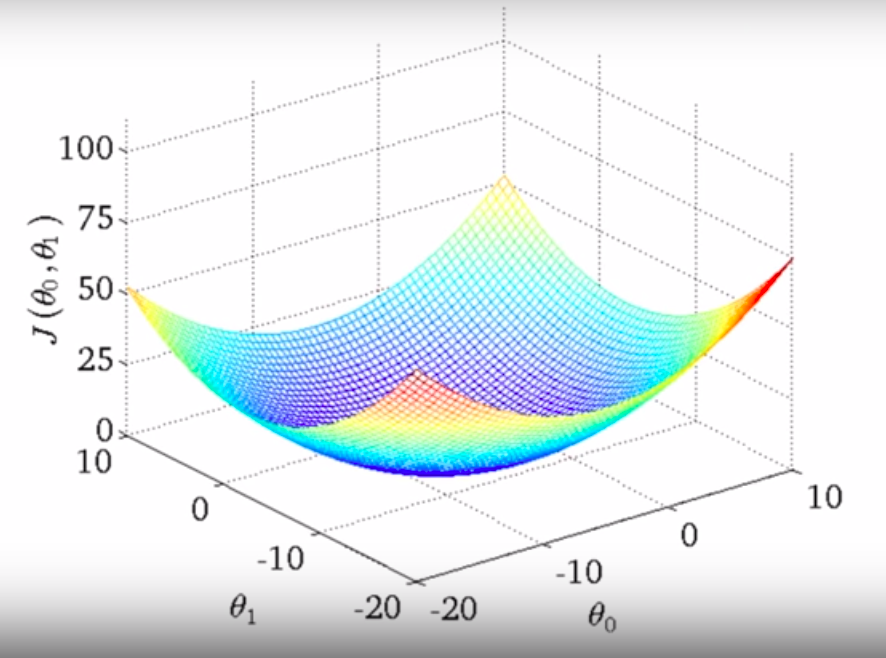

In [13]:
Image("G4.png",width=600,height=500)


## 6.Implementation of the gradient descent on the above plotted Data. <a class="anchor" id="seventh-bullet"></a>

Now we will fit the linear regression parameters θ to our dataset using gradient descent
**Update Equations**
The objective of linear regression is to minimize the cost function

$$  
J({\theta}_0,{\theta}_1) = \frac{1}{2m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})^2 
$$ 

where the hypothesis  $ h_{\theta}(x)$  is given by the linear model
$$
h_{\theta}(x)={\theta}^Tx = {\theta}_0 + {\theta}_1x_1 
$$
Recall that the parameters of your model are the ${\theta}_j$ values. These are the values you will adjust to minimize cost $J({\theta}_0,{\theta}_1)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$
{\theta}_j:={\theta}_j- \alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)} )-y^{(i)})(x_j^{(i)}) 
$$

(simultaneously update ${\theta}_j$ for all $j$).

With each step of gradient descent, your parameters ${\theta}_j$ come closer to the optimal values that will achieve the lowest cost $J({\theta}_0,{\theta}_1)$ 

we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the ${\theta}_0 $ intercept term.i.e. our hypothesis become
$$
h_{\theta}(x)={\theta}^Tx = {\theta}_0x_0 + {\theta}_1x_1 
$$

where $x_0 = 1$ always, so which is same as previous hypothesis.
We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.


In [14]:
x=np.insert(x,0,1,axis=1) #Add a column of ones to x
np.shape(x)

(97, 2)

In [15]:
theta=np.zeros([2,1])  # initialize fitting parameters
theta
#np.shape(theta)


array([[0.],
       [0.]])

In [16]:
# compute and display initial cost

def Compute_Cost(x,y,theta):
    m=len(y)
    J=0;
    for i in range(m):
        #print(i)
        J=J+ (np.dot(x[i,:],(theta))-y[i])**2
    return (J/(2*len(y)))

J=Compute_Cost(x,y,theta)

print('With theta = [0 ; 0] Cost computed = %.3f' %(J));
print('Expected cost value (approx) %.2f'% 32.07);

# further testing of the cost function

J=Compute_Cost(x,y,[[-1],[2]])
print('\nWith theta = [-1 ; 2] Cost computed = %.3f' %(J) );
print('Expected cost value (approx)%.2f' %54.24);

With theta = [0 ; 0] Cost computed = 32.073
Expected cost value (approx) 32.07

With theta = [-1 ; 2] Cost computed = 54.242
Expected cost value (approx)54.24


Next, we will implement gradient descent as the code follow next.As you are going through the  program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost J(θ) is
parameterized by the vector ${\theta}$, not $X$ and $y$. That is, we minimize the value of $J({\theta}_0,{\theta}_1)$  by changing the values of the vector ${\theta}$, not by changing $X$ or $y$. Refer to the
equations above.

A good way to verify that gradient descent is working correctly is to look at the value of $J({\theta}_0,{\theta}_1)$  and check that it is decreasing with each step.The code for gradient Descent  calls `compute_Cost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `compute_Cost` correctly, your value of $J({\theta}_0,{\theta}_1)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [17]:
# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

# Run the gradient descent 
def gradient_Descent(x,y,theta,alpha,num_iter):
    m=len(y)
    J_history = np.zeros([num_iter, 1])
    sum=np.transpose(np.zeros([2,1]))
    for i in range(num_iter):
        for j in range(m):
            sum=sum+ ((np.dot(x[j,:],(theta))-y[j])*x[j,:])
        
        sum=sum*(alpha/m)
        theta=theta-np.transpose(sum)
        J_history[i]=Compute_Cost(x,y,theta)
    return(theta,J_history)

    
theta,J_history= gradient_Descent(x,y,theta,alpha,iterations) 

# print theta to screen
np.set_printoptions(precision=4)
print('Theta found by gradient descent:\n')
print("theta_0 = {}, theta_1 = {}\n".format(*theta))

print('Expected theta values (approx)\n')
#print(' -3.6303  1.1664\n\n');
print('{} and {}\n\n'.format(-3.6303,1.1664))


Theta found by gradient descent:

theta_0 = [-3.6304], theta_1 = [1.1664]

Expected theta values (approx)

-3.6303 and 1.1664




## 7.Fit the line with the help of the estimated parameters ${\theta}_i$. <a class="anchor" id="eighth-bullet"></a>

Will use your final parameters to plot the linear fit. The result should look something like as shown below.

In [18]:
Line_fit=np.matmul(x, theta) 

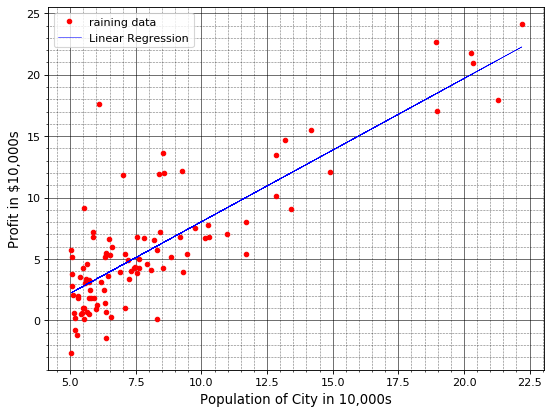

In [19]:
# Plot the linear fit
plt.figure(num=0, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x[:,1], y, 'ro', x[:,1], Line_fit, 'b', linewidth=0.5, markersize=4)
plt.ylabel('Profit in $10,000s',fontsize=12)              # Set the y axis label
plt.xlabel('Population of City in 10,000s',fontsize=12)   # Set the x axis label

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend(["raining data", "Linear Regression"], loc="upper left")
plt.show()

Now the final values for ${\theta}_0 ,{\theta}_1 $ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. Note the way that the following lines in uses matrix multiplication, rather than explicit summation or looping, to calculate the predictions.

In [20]:
# Predict values for population sizes of 35,000 and 70,000
predict1 =np.matmul ([1, 3.5] ,theta)
print('For population = 35,000, we predict a profit of %f\n' % (predict1*10000))
predict2 =np.matmul ([1, 7] ,theta)
print('For population = 70,000, we predict a profit of %f\n' % (predict2*10000))


For population = 35,000, we predict a profit of 4519.286628

For population = 70,000, we predict a profit of 45342.229861



## 8.Visualizing $J({\theta}_0,{\theta}_1)$ vs ${\theta}_0,{\theta}_1$.<a class="anchor" id="ninth-bullet"></a>

To understand the cost function $J({\theta}_0,{\theta}_1)$.better, we will now plot the cost over a 2-dimensional grid of ${\theta}_0$ and ${\theta}_1$ values. you should understand how the below code have written to create the 2-D plot and contour plot.

Think about this:
1. Why here contour plot is used ?

**1. Surface plot**:

In the next step there is code set up to calculate $J({\theta}_0,{\theta}_1)$ over a grid of values using the `compute_Cost` function that we had written above.



In [21]:

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros([len(theta0_vals), len(theta1_vals)])
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[[i],[j]]=Compute_Cost(x,y,t)
        
        

/home/anil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  """


Text(0.5, 0, '$J({\\theta}_0,{\\theta}_1)$')

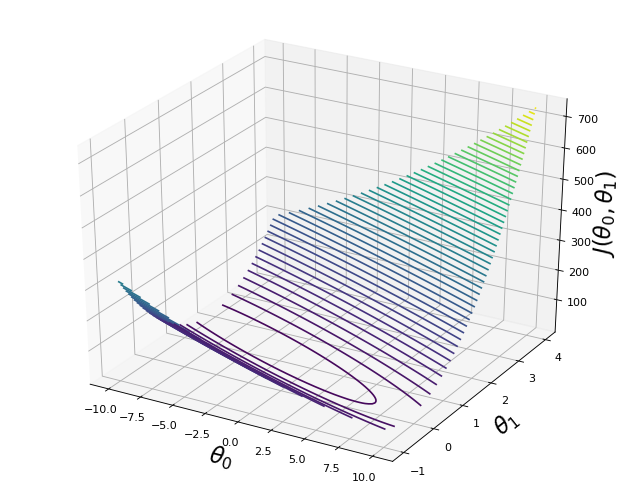

In [22]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.contour3D(theta0_vals, theta1_vals, np.transpose(J_vals), 50, rstride=1, cstride=1,
                cmap="viridis", edgecolor="none")
ax.set_xlabel(r'$\theta_0$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel(r'$J({\theta}_0,{\theta}_1)$', fontsize=20)

#ax.view_init(12.5, 47)


**2.Contour plot** 

The answer for the above question,Why here we used contour plot is very simple basically we want to simplified version of the above 3-D plot of $J({\theta}_0,{\theta}_1)$ vs ${\theta}_0,{\theta}_1$. So we go for 2-D version of the above surface plot which is **Contour plot**  and that plot is imagine as if you remove the `ax.view_init(12.5, 47)`from above code and see the resultant plot from top view it would be number of concentric circles.Where center is of the plot is our local optimum point. 
  

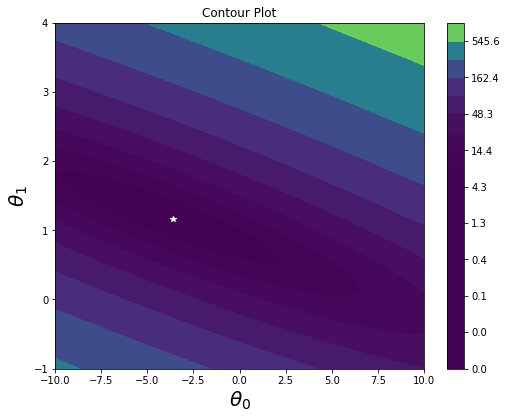

In [23]:
# plot the contour plot. 
fig = plt.figure(figsize=(8,6))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 


cp = plt.contourf(theta0_vals,theta1_vals ,np.transpose(J_vals),np.logspace(-2.0, 3.0, num=20))
plt.colorbar(cp)
plt.plot(theta[0],theta[1],'w*')
ax.set_title('Contour Plot')
ax.set_xlabel(r'$\theta_0$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
plt.show()

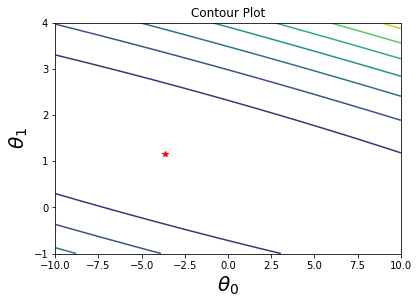

In [24]:
fig = plt.figure(figsize=(6,4))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = ax.contour(theta0_vals,theta1_vals ,np.transpose(J_vals))#level=np.logspace(-2.0, 3.0, num=20))
#ax.clabel(cp, inline=True, 
         # fontsize=10)
plt.plot(theta[0],theta[1],'r*')

ax.set_title('Contour Plot')
ax.set_xlabel(r'$\theta_0$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
plt.show()

In [25]:
theta

array([[-3.6304],
       [ 1.1664]])

In [26]:
theta_extra=np.zeros([2,1])  # initialize fitting parameters again 
theta_extra

array([[0.],
       [0.]])

In [27]:

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;
theta1=np.zeros([1500, 1])
theta2=np.zeros([1500, 1])
# Run the gradient descent 
def gradient_Descent(x,y,theta_extra,alpha,num_iter):
    m=len(y)
    J_history = np.zeros([num_iter, 1])
    sum=np.transpose(np.zeros([2,1]))
    for i in range(num_iter):
        for j in range(m):
            sum=sum+ ((np.dot(x[j,:],(theta_extra))-y[j])*x[j,:])
        
        sum=sum*(alpha/m)
        theta_extra=theta_extra-np.transpose(sum)
        for k in range(1):
            theta1[i]=theta_extra[k]
            theta2[i]=theta_extra[k+1]
            #print(theta1[i],theta2[i])

gradient_Descent(x,y,theta_extra,alpha,iterations) 

In [28]:
from ipywidgets import interact
def Contour_Plot(T):
    fig = plt.figure(figsize=(10,8))
    left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes([left, bottom, width, height]) 


    cp = plt.contourf(theta0_vals,theta1_vals ,np.transpose(J_vals),np.logspace(-2.0, 3.0, num=20))
    plt.colorbar(cp)
    plt.plot(theta1[T],theta2[T],'w*')
    ax.set_title('Contour Plot')
    ax.set_xlabel(r'$\theta_0$', fontsize=20)
    ax.set_ylabel(r'$\theta_1$', fontsize=20)
    plt.show()

#Contour_Plot(theta1[100],theta2[100])

ipyw.interact(
    Contour_Plot,
    T=ipyw.IntSlider(min=0, 
                     max=1499, 
                     step=1, 
                     value=0)
)

interactive(children=(IntSlider(value=0, description='T', max=1499), Output()), _dom_classes=('widget-interact…

<function __main__.Contour_Plot(T)>

The above plot you can vary the values of the Parameters ${\theta}_0 ,{\theta}_1$ by varying the value of `T` from the slider.You can see as you change the `T` which in turn change the Parameters ${\theta}_0 ,{\theta}_1$ by changing the `theta1[]` and `theta2[]` and see the **White star** moving towards an local optimum value.

Below is the plot of the $J({\theta})$ vs Number of Iterations,Which is evidence that as the iterations increases the value of the  $J({\theta})$ decreases and at one point it get saturate to the value `4.834`. We will talk more about this in multiple linear regression model or linear Regression with multiple variable.

[4.4834]


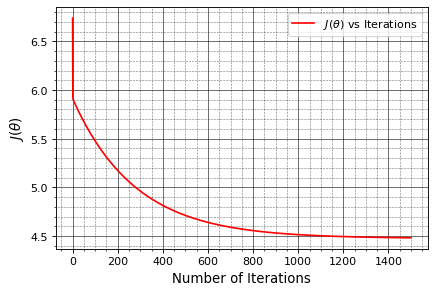

In [29]:
print(J_history[1499])
plt.figure(num=0, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.linspace(0,1499,1500),J_history,'r',linewidth=1.5)
plt.ylabel(r'$J({\theta})$',fontsize=12)
plt.xlabel('Number of Iterations',fontsize=12)

# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid

plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend([r'$J({\theta})$ vs Iterations'], loc="upper right")
plt.show()

## 9.Linear Regression using scikit-learn.<a class="anchor" id="tenth-bullet"></a>

This is the linear regression model implemented using `scikit-learn` library.The document for `scikit-learn` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

In [30]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import display, Math


In [31]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [32]:
df.shape

(97, 2)

## 9.1 Data Visualization <a class="anchor" id="9.1"></a>

Here we will use `seaborn.jointplot` to visualize the data.The document link is [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html). 

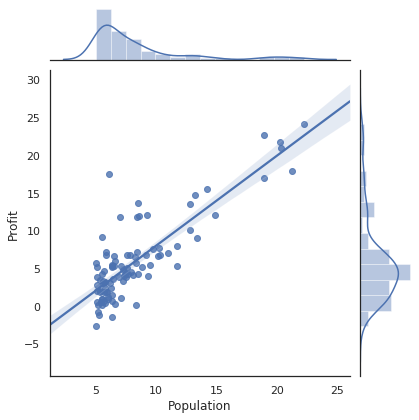

In [33]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.jointplot(x=df['Population'], y=df['Profit'], data=df, kind='reg')

## 9.2 Splitting data into test and train <a class="anchor" id="9.2"></a>


In [34]:
x_train, x_test, y_train, y_test = train_test_split(df['Population'], df['Profit'], test_size=0.2, random_state=42)
x_train=x_train.tolist()
x_test=x_test.tolist()
y_train=y_train.tolist()
y_test=y_test.tolist()
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (77, 1)
Test - Predictors shape (20, 1)
Train - Target shape (77, 1)
Test - Target shape (20, 1)


In [35]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
prediction = cls.predict(x_test)

In [37]:
#Parameters used for the model 
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[1.2875]]


In [39]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [-4.7324]


In [40]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 15.709362447765187


In [41]:
display(Math(r'Model R^2 Square \ value =\ {}'.format( metrics.r2_score(y_test, prediction))))

<IPython.core.display.Math object>

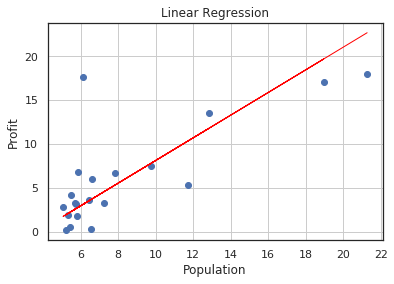

In [42]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=1)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Linear Regression')
plt.grid(which='both')
plt.show()

## 10.Linear Regression from Statistical point of view and Least Square.  <a class="anchor" id="eleventh-bullet"></a>

The statistical point of view is related to the values of the `mean square error` and the ${R^2}$ value we estimated last using the `Scikit-learn`. We will understand this concept with simple example and visualization.lets start what is **least square** which we had little idea as If you carefully see the cost function $J({\theta})$ which we are trying to minimize to find ${\theta}$ is actually an **error value** or **average square error** which we want as least value,hence called **Least Square error**.Last square is most popular method to find out the fitting parameter ${\theta}s$ analytically. One simple linear algebra method or equation will help you to find out all the theta values.

$$
{\theta}=(X^TX)^{-1}X^Ty
$$

Where,
$X$ is Matrix of feature vectors and $y$ is target vector. As we are dealing with simple linear regression with one variable or one feature $x_1$ and also consider $x_0=1$, consider we have $m$ examples for our single feature $x_1$.

$$
X=
\begin{bmatrix}
x^{(1)}_0 & x^{(1)}_1 \\
x^{(2)}_0 & x^{(2)}_1 \\
x^{(3)}_0 & x^{(3)}_1 \\
\vdots    & \vdots    \\
x^{(m)}_0 & x^{(m)}_1 \\
\end{bmatrix}
$$

$$
X=
\begin{bmatrix}
1 \ & x^{(1)}_1 \\
1 \ & x^{(2)}_1 \\
1 \ & x^{(3)}_1 \\
\vdots & \vdots  \\
1 \ & x^{(m)}_1 \\
\end{bmatrix}
$$

and 
$$
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
y^{(3)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
$$

So now you might think from where we arrive this expression 
$$
{\theta}=(X^TX)^{-1}X^Ty
$$

for that you have read the theory of [Linear Algebra](http://facultymember.iaukhsh.ac.ir/images/Uploaded_files/[Strang_G.]_Linear_algebra_and_its_applications(4)[5881001].PDF) under chapter  **3 Orthogonality - 3.3 Projections and Least Squares**.I will try add the mathematics behind it as update this notebook.

Now to understand the concept of the $R^2$,consider the example that we have data of the bunch of the mouse for its weight and size.We want to predict the size of the mouse given the weight of the mouse.
![data](SLR00.png)

As shown below image we fit the line using **least square** or by finding optimum parameter ${\theta}$ to minimize the cost $J(\theta)$. 
![data](SLR.png)

As shown below fig the y-axis intercept and the slope are the two parameters which least square estimate.
![data](SLR1.png)

Since the slope is not zero knowing the mouse weight will help us to guess the mouse size.But how good that guess will be.Here $R^2$ comes in to the picture. calculating the $R^2$ will be the first step in determining how good that guess will be.   

![data](SLR0.png)

Now simplicity do not consider the weight of the mouse and shift all the data points on the y-axis by considering only the size of mouse.

![data](SLR2.png)

Now we will draw the black line which has all x-coordinate zero and will pass from the y-axis at the point of the average size mouse size and parallel to x-axis.just like least square we measure the distance from the mean value or average value or from the black line to the data points ,square it and add it together as shown below figures.

![data](SLR3.png)
![data](SLR4.png)

Dividing that value by $n$,the number of data points we are estimating the variation around the mean.i.e. average sum of square per mouse as:

$$
var(mean)= \frac{Data- mean}{n}
$$

**NOTE**:This variation is for the mouse size by not considering the mouse weight.

Now suppose we fit the line using least square method as shown below and estimate the variance which is our least square error or average square error.

![data](SLR5.png)


$$
var(fit)= \frac{Data- LineFit}{n}
$$


![data](SLR6.png)

Above figure is evidence that the variation is less for **least square fit is less** as compare to normal average line fit.We can say that variation can change or reduce as we consider the mouse weight.In other words heavier moue are bigger in size and vice-versa. **$R^2$ tells us how much variation in the mouse size can be explain by considering the weight of the mouse.** Thus formula for $R^2$ is 

$$
R^2=\frac{var(mean)-var(fit)}{var(mean)}
$$
![data](SLR7.png)

Now let's say we have variance along the mean line is $var(mean)=11.1$. and variance along the fit line is $var(fit)=4.4$. then 

$$
R^2=\frac{11.1-4.4}{11.1}=0.6=60\%
$$

This means there is $60\%$ reduction in variance when we take mouse weight into account.Alternatively we can say that mouse weight **explains the $60\%$ variation in the mouse size**.

Now consider following example,Where my fitted line is perfectly fit i.e we have zero least square error or variance along the fitted line is zero.which means $R^2=1=100\%$ 
![data](SLR8.png)
![data](SLR9.png)

$R^2=1=100\%$ means the mouse weight explain 100% of the variation in the mouse size.

one last example as shown below,Where the fitted line by least square is same as mean fit line.so both $var(mean)$ and $var(fit)$ are same value. so the $R^=0=0\%$ 
![data](SLR10.png)
![data](SLR11.png)

So now $R^=0=0\%$  the mouse weight doesn't explain the variation in the mouse size. As both heavier mouse and lighter mouse the size is varying equally likely. 

To understand more you can see this video lecture [StatQuest with Josh Starmer](https://www.youtube.com/watch?v=nk2CQITm_eo&t=312s).


Now in our Profit prediction example we found out the $R^2=0.50$ value by using `sklearn.metrics` on the **Prediction** and **y_test**. This value $R^2=0.5$ tells us **how much the population explain the variation along the profit**.So,we try to improve this value by fitting best line. The $Mean Square Error \ MSE= 15.709362447765187 $ is the least square error,or cost value $J({\theta})$ after fitting the optimal line,estimated on the **Prediction** and **y_test**.Again the best fitted line will have less error. Next module we will implement Linear Regression using normal equations.

## 11.Linear Regression using normal equations.<a class="anchor" id="11"></a>

In [43]:
# This function estiamte optimum values for parametrs using leas sqaure.

def theta_calc_least_sqaure(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    value_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    value_2 = np.dot(value_1, x_train_b.T)
    theta = np.dot(value_2,y_train)
    #
    return theta

In [44]:
# This function predict the value on the test set uisng fitted parameters.
def predict_func(slope,intercept,x_test):
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i]) + intercept)
        
    return pred

In [45]:
# This function estimate the MSE by using predicted value an actual value on test set.
def MSE_calc(prediction, y_test):
    #
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [46]:
def Rsq(prediction, y_test):
    total_data = len(prediction)
    #Average of y_test set
    y_avg = np.sum(y_test)/total_data
    #total sum of square error 
    tot_err = np.sum((y_test-y_avg)**2)
    # variance for y_test_set or var(mean)
    var_tot_err=tot_err/total_data
    #total sum of squared error or least square error
    least_square_err = np.sum((y_test-prediction)**2)
    # var(fit)
    var_least_square_err=least_square_err/total_data
    #
    r2 = (var_tot_err-var_least_square_err)/var_tot_err
    return r2

In [47]:
#Finding optimal theta value using normal equations
theta = theta_calc_least_sqaure(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  MSE_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = Rsq(prediction, y_test)
#print('R squared value', r2_val)
display(Math(r'Model R^2 Square \ value =\ {}'.format(r2_val)))

Intercept of the model [-4.7324]
Slope of the model [1.2875]
Mean squared error of the model 15.709362447765116


<IPython.core.display.Math object>

The values are same as we estimated using `scikit-learn`.


## References. <a class="anchor" id="twelfth-bullet"></a>
 
   * [1] [Coursera ML course by Andrew Ng.](https://www.youtube.com/watch?v=PPLop4L2eGk&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=1)
   
   * [2] [Bishop - Pattern Recognition And Machine Learning - Springer  2006](https://www.academia.edu/17851990/Bishop_Pattern_Recognition_and_Machine_Learning)
   
   * [3] [towards Data science](https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86)
   * [4] [Linear regression with one variable](https://www.internalpointers.com/post/linear-regression-one-variable)
   * [5] [Linear Algebra by Gilbert Strang](http://facultymember.iaukhsh.ac.ir/images/Uploaded_files/[Strang_G.]_Linear_algebra_and_its_applications(4)[5881001].PDF))
   * [6] [StatQuest with Josh Starmer.](https://www.youtube.com/watch?v=nk2CQITm_eo&t=312s)